<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 19: A/B Testing

Associated Textbook Sections: [12.0, 12.1](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-19:-A/B-Testing" data-toc-modified-id="Lecture-19:-A/B-Testing-1">Lecture 19: A/B Testing</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#A/B-Testing" data-toc-modified-id="A/B-Testing-1.3">A/B Testing</a></span><ul class="toc-item"><li><span><a href="#Comparing-Two-Samples" data-toc-modified-id="Comparing-Two-Samples-1.3.1">Comparing Two Samples</a></span></li><li><span><a href="#Demo:-Comparing-Two-Samples" data-toc-modified-id="Demo:-Comparing-Two-Samples-1.3.2">Demo: Comparing Two Samples</a></span></li><li><span><a href="#The-Groups-and-the-Question" data-toc-modified-id="The-Groups-and-the-Question-1.3.3">The Groups and the Question</a></span></li><li><span><a href="#Hypotheses" data-toc-modified-id="Hypotheses-1.3.4">Hypotheses</a></span></li><li><span><a href="#Test-Statistic" data-toc-modified-id="Test-Statistic-1.3.5">Test Statistic</a></span></li><li><span><a href="#Demo:-Test-Statistic" data-toc-modified-id="Demo:-Test-Statistic-1.3.6">Demo: Test Statistic</a></span></li><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1.3.7">The Data</a></span></li><li><span><a href="#Shuffling-Labels-Under-the-Null" data-toc-modified-id="Shuffling-Labels-Under-the-Null-1.3.8">Shuffling Labels Under the Null</a></span></li></ul></li><li><span><a href="#Shuffling-Rows" data-toc-modified-id="Shuffling-Rows-1.4">Shuffling Rows</a></span><ul class="toc-item"><li><span><a href="#Random-Permutation" data-toc-modified-id="Random-Permutation-1.4.1">Random Permutation</a></span></li><li><span><a href="#Demo:--Random-Permutation-(Shuffling)" data-toc-modified-id="Demo:--Random-Permutation-(Shuffling)-1.4.2">Demo:  Random Permutation (Shuffling)</a></span></li><li><span><a href="#Simulating-Under-the-Null" data-toc-modified-id="Simulating-Under-the-Null-1.4.3">Simulating Under the Null</a></span></li><li><span><a href="#Demo:-Simulation-Under-Null-Hypothesis" data-toc-modified-id="Demo:-Simulation-Under-Null-Hypothesis-1.4.4">Demo: Simulation Under Null Hypothesis</a></span></li><li><span><a href="#Demo:-Permutation-Test" data-toc-modified-id="Demo:-Permutation-Test-1.4.5">Demo: Permutation Test</a></span></li></ul></li><li><span><a href="#How-We've-Tested-Thus-Far" data-toc-modified-id="How-We've-Tested-Thus-Far-1.5">How We've Tested Thus Far</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-Testing-Review" data-toc-modified-id="Hypothesis-Testing-Review-1.5.1">Hypothesis Testing Review</a></span></li></ul></li></ul></li></ul></div>

## A/B Testing

### Comparing Two Samples

* Compare values of sampled individuals in Group A with values of sampled individuals in Group B.
* Question: Do the two sets of values come from the same underlying distribution?
* Answering this question by performing a statistical test is called A/B testing.

### Demo: Comparing Two Samples

Load the `baby.csv` data and visually compare the distributions of birth weights for babies born to mothers that smoked and didn't smoke during pregnancy.

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [4]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


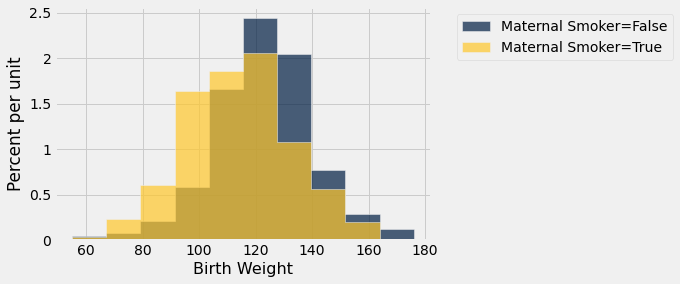

In [5]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

### The Groups and the Question

* Random sample of mothers of newborns. Compare:
    * (A) Birth weights of babies of mothers who smoked during pregnancy 
    * (B) Birth weights of babies of mothers who didn't smoke
* Question: Could the difference be due to chance alone?


### Hypotheses

* Null: In the population, the distributions of the birth weights of the babies in the two groups are the same. (They are different in the sample just due to chance.)
* Alternative: In the population, the babies of the mothers who smoked weigh less, on average, than the babies of the non-smokers.


### Test Statistic

* Group A: non-smokers
* Group B: smokers
* Statistic: Difference between average weights: `group_B_mean - group_A_mean`  
* Negative values of this statistic favor the alternative


### Demo: Test Statistic

Determine the average difference in the birth weights associated with mothers that did and didn't smoke during pregnancy.

In [6]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [7]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

Create a function that take name of table, column label of numerical variable, column label of group-label variable and returns the difference of means of the two groups.

In [8]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [9]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

### The Data

<img src="img/lec19_the_data.png" width=80%>

### Shuffling Labels Under the Null

<img src="img/lec19_shuffling_labels.png" width=80%>

## Shuffling Rows

### Random Permutation

* `tbl.sample(n)`: Table of `n` rows picked randomly with replacement
* `tbl.sample()`: Table with same number of rows as original `tbl`, picked randomly with replacement
* `tbl.sample(n, with_replacement = False)`: Table of `n` rows picked randomly without replacement
* `tbl.sample(with_replacement = False)`: All rows of `tbl`, in random order

### Demo:  Random Permutation (Shuffling)

Demonstrate how to perform a random permutation using the `sample` method.

In [11]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))
letters

Letter
a
b
c
d
e


In [13]:
letters.sample()

Letter
c
b
e
a
e


In [14]:
letters.sample(with_replacement = False)

Letter
c
b
a
d
e


In [15]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,e
b,b
c,a
d,c
e,d


### Simulating Under the Null

* If the null is true, all rearrangements of labels are equally likely
* Plan:
    1. Shuffle all group labels
    1. Assign each shuffled label to a birth weight
    1. Find the difference between the averages of the two shuffled groups
    1. Repeat


### Demo: Simulation Under Null Hypothesis

Perform a random permutation on the table containing a Boolean-valued column representing whether or not the mother smoked during pregnancy and a integer-valued column of their baby's birth weight.

In [16]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [21]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')
shuffled_labels

array([False, False,  True, ..., False,  True, False])

In [22]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,False
False,113,False
True,128,True
True,108,False
False,136,False
False,138,False
False,132,True
False,120,True
True,143,False
False,140,False


Calculate the difference of the birth weight means for the two smoking groups based on the shuffled data and the original data.

In [23]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

-0.11911269558328286

In [24]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

### Demo: Permutation Test

Perform a permutation test using 2500 simulations to determine how likely it is to see the observed birth weights if it is assumed that there was no impact on birth weight due to the mother smoking or not during pregnancy. *This might take a few minutes to run.*

In [25]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [26]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

0.12771759830583562

In [28]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


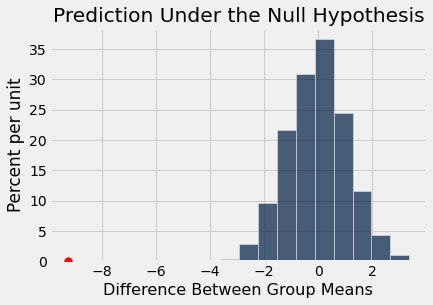

In [29]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.scatter(observed_difference, 0, color='red', s=60, zorder=3)
plots.title('Prediction Under the Null Hypothesis');

## How We've Tested Thus Far

### Hypothesis Testing Review

* 1 Sample: One Category (e.g. percent of flowers that are purple)
    * Test Statistic: `empirical_percent`, `abs(empirical_percent - null_percent)`
    * How to Simulate: `sample_proportions(n, null_dist)`
* 1 Sample: Multiple Categories (e.g. ethnicity distribution of jury panel)
    * Test Statistic: `tvd(empirical_dist, null_dist)`
    * How to Simulate: `sample_proportions(n, null_dist)`
* 1 Sample: Numerical Data (e.g. scores in a lab section)
    * Test Statistic: `empirical_mean`, `abs(empirical_mean - null_mean)`
    * How to Simulate: `population_data.sample(n, with_replacement=False)`
* 2 Samples: Numerical Data (e.g. birth weights of smokers vs. non-smokers)
    * Test Statistic: `group_a_mean - group_b_mean`, `group_b_mean - group_a_mean`, `abs(group_a_mean - group_b_mean)`
    * How to Simulate: `empirical_data.sample(with_replacement=False)`


<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>